<a href="https://colab.research.google.com/github/Shisiajoy/MACHINE-LEARNING-1/blob/main/Data_prep(semiconductors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
url = '/content/chip_dataset.csv'
df  = pd.read_csv(url)

In [4]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [6]:
#missing numerical data
df.select_dtypes(include='number').isna().sum()

Freq (GHz)      437
FP16 GFLOPS    4145
FP32 GFLOPS    3260
FP64 GFLOPS    3667
dtype: int64

In [7]:
#missing categorical data
df.select_dtypes(exclude='number').isna().sum()

Product                    0
Type                       0
Release Date             199
Process Size (nm)          0
TDP (W)                  437
Die Size (mm^2)          352
Transistors (million)    555
Foundry                  615
Vendor                     0
dtype: int64

In [8]:
#df.drop(columns=['Foundry'], inplace=True)

In [8]:
# Convert non-numeric values to NaN in 'TDP(W)' column
df['TDP (W)'] = pd.to_numeric(df['TDP (W)'], errors='coerce')

# Impute missing values for 'TDP(W)' using median
df['TDP (W)'].fillna(df['TDP (W)'].median(), inplace=True)

In [9]:
print(df['Die Size (mm^2)'].unique())


['120' '129' '217' '80' '106' '375' '84' '193' '83' '115' '199' '156'
 '150' '101' '144' '146' '109' '56' '131' nan '269' '100' '237' '112'
 '135' '125' '90' '206' '2x 81' '213' '235' '126' '220' '103' '111' '143'
 '2x 143' '435' '77' '230' '103.1' '183' '101.3' '285' '66' '2x 107'
 '25.96' '26' '76' '82' '107' '81' '2x 82' '263' '63' '117' '169' '258'
 '96' '296' '346' '87' '65' '684' '239' '228' '75' '315' '316' '149' '216'
 '246' '2x 315' '94' '118' '133' '160' '350' '177' '257' '264' '341' '245'
 '50' '356' '622' '182' '122' '46' '250' '124' '171' '456' '192' '2x 213'
 '93' '123' '154' '484' '209.8' '210' '4x 213' '70.52' '180.3' '148' '74'
 '2x 74' '4x 74' '180' '8x 74' '177.5' '195' '308' '190' '146.1' '215'
 '276' '8x 81' '4x 72' '8x 72' '12x 72' '71' '208' '2x 71' '4x 81' '163'
 '73' '2x 73' '4x 73' '8x 73' '137' '178' '4x 71' '8x 71' '12x 71'
 '2x 763' 'unknown' '88' '64' '279' '68' '128' '142' '188' '97' '174'
 '218' '92' '98' '130' '91' '121' '207' '240' '281' '289' '297' '1

In [10]:
# Convert non-numeric values to NaN in 'Die Size (mm^2)' column
df['Die Size (mm^2)'] = pd.to_numeric(df['Die Size (mm^2)'], errors='coerce')

# Impute missing values for 'Die Size (mm^2)' using mean
df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].mean(), inplace=True)


In [11]:
import pandas as pd

# Convert non-numeric values to NaN in 'Transistors (million)' column
df['Transistors (million)'] = pd.to_numeric(df['Transistors (million)'], errors='coerce')

# Impute missing values for 'Transistors (million)' using median
median_transistors = df['Transistors (million)'].median()
df['Transistors (million)'].fillna(median_transistors, inplace=True)


In [22]:
df['Release Date'].fillna('Unknown', inplace=True)

In [12]:
df.isna().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [13]:
# Group by relevant attributes and impute missing values in 'Freq (GHz)' column
# For example, grouping by 'Vendor' and 'Type' and imputing with median frequency within each group
df['Freq (GHz)'] = df.groupby(['Vendor', 'Type'])['Freq (GHz)'].transform(lambda x: x.fillna(x.median()))


In [14]:

df.isna().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (GHz)                  0
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [15]:
# Specify the format of the datetime strings in 'Release Date' column
date_format = '%m/%d/%y'

# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], format=date_format)


In [16]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,NaN,AMD,NaN,NaN,NaN


In [17]:
df.isna().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (GHz)                  0
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [20]:
print(df['Foundry'].unique())


[nan 'Intel' 'TSMC' 'Fujitsu' 'GlobalFoundries' 'IBM' 'NEC' 'UMC' 'Sony'
 'Samsung' 'Renesas']


In [22]:
# Get the count of each unique value in the 'Foundry' column
foundry_counts = df['Foundry'].value_counts()

# Print the count of each unique value
print("Count of each unique value in 'Foundry' column:")
print(foundry_counts)


Count of each unique value in 'Foundry' column:
Foundry
TSMC               2202
Intel              1444
GlobalFoundries     433
Samsung             132
UMC                  85
Sony                 18
Fujitsu               6
IBM                   4
NEC                   4
Renesas               2
Name: count, dtype: int64


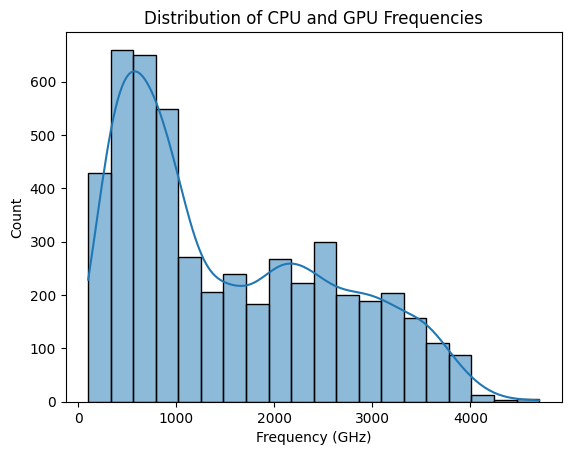

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualizations
sns.histplot(df['Freq (GHz)'], bins=20, kde=True)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Count')
plt.title('Distribution of CPU and GPU Frequencies')
plt.show()

#sns.scatterplot(x='Process Size (nm)', y='FP32 GFLOPS', data=df)
#plt.xlabel('Process Size (nm)')
#plt.ylabel('FP32 GFLOPS')
#plt.title('Relationship between Process Size and GPU Performance')
#plt.show()


**5.Perfom a full EDA and demonstrate the validity of the following assumptions**

1.Moore's Law still holds, especially in GPUs.

In [28]:
# Extract year from 'Release Date'
df['Year'] = df['Release Date'].dt.year

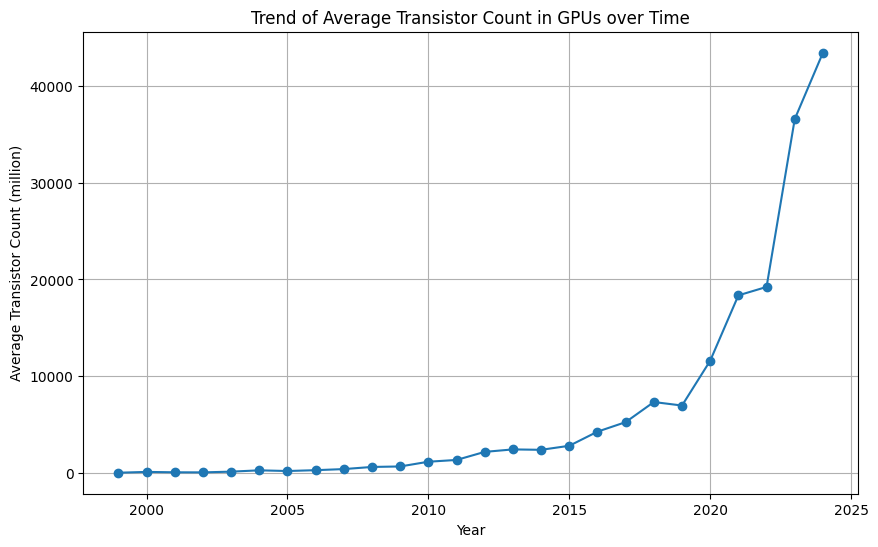

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter GPUs
gpu_df = df[df['Type'] == 'GPU']

# Group by year and calculate the average transistor count or frequency
avg_transistor_count_per_year = gpu_df.groupby('Year')['Transistors (million)'].mean()

# Plot the trend of average transistor count over time
plt.figure(figsize=(10, 6))
avg_transistor_count_per_year.plot(marker='o')
plt.title("Trend of Average Transistor Count in GPUs over Time")
plt.xlabel("Year")
plt.ylabel("Average Transistor Count (million)")
plt.grid(True)
plt.show()


2.Dannard Scaling is still valid in general.

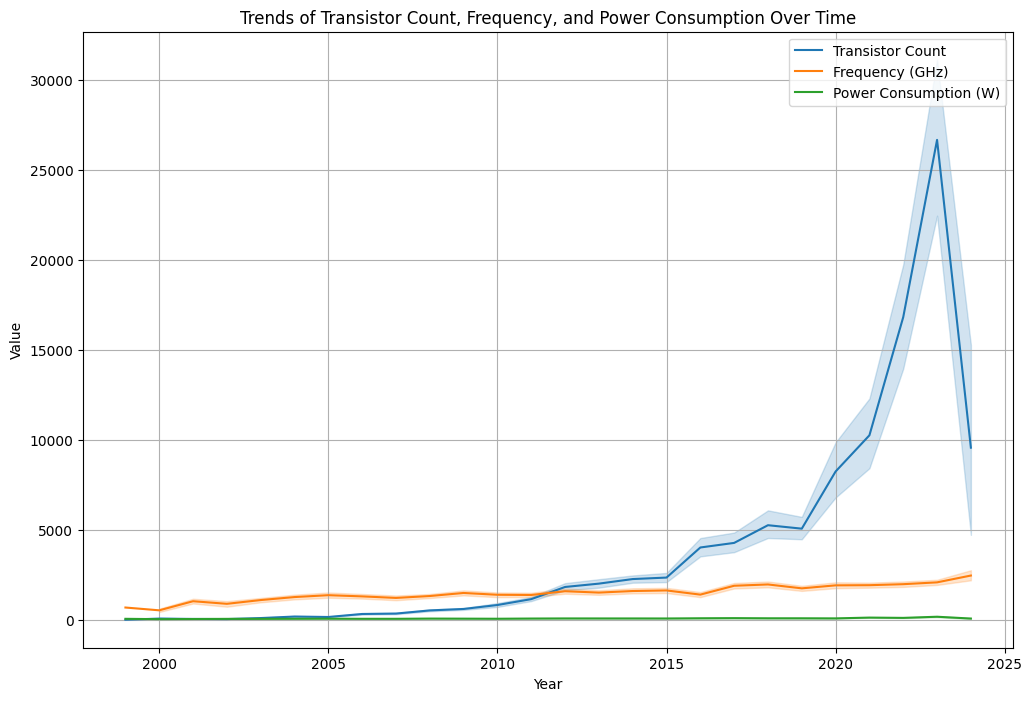

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot trends of transistor count, frequency, and power consumption over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Transistors (million)', label='Transistor Count')
sns.lineplot(data=df, x='Year', y='Freq (GHz)', label='Frequency (GHz)')
sns.lineplot(data=df, x='Year', y='TDP (W)', label='Power Consumption (W)')
plt.title("Trends of Transistor Count, Frequency, and Power Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


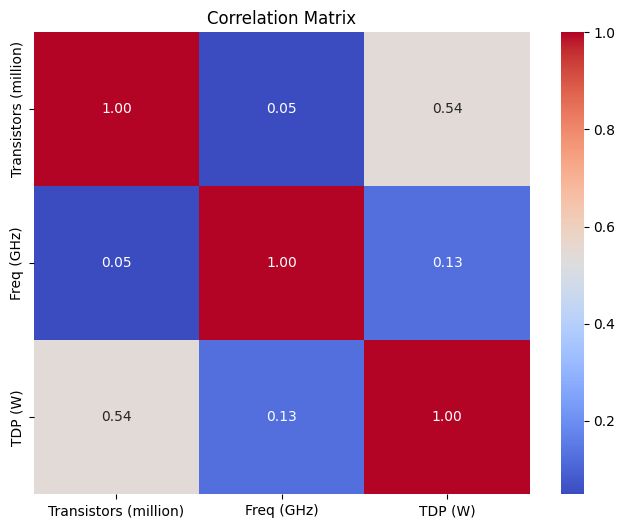

In [31]:
# Calculate the correlation matrix
correlation_matrix = df[['Transistors (million)', 'Freq (GHz)', 'TDP (W)']].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


3.CPUs have higher frequencies, but GPUs are catching up.

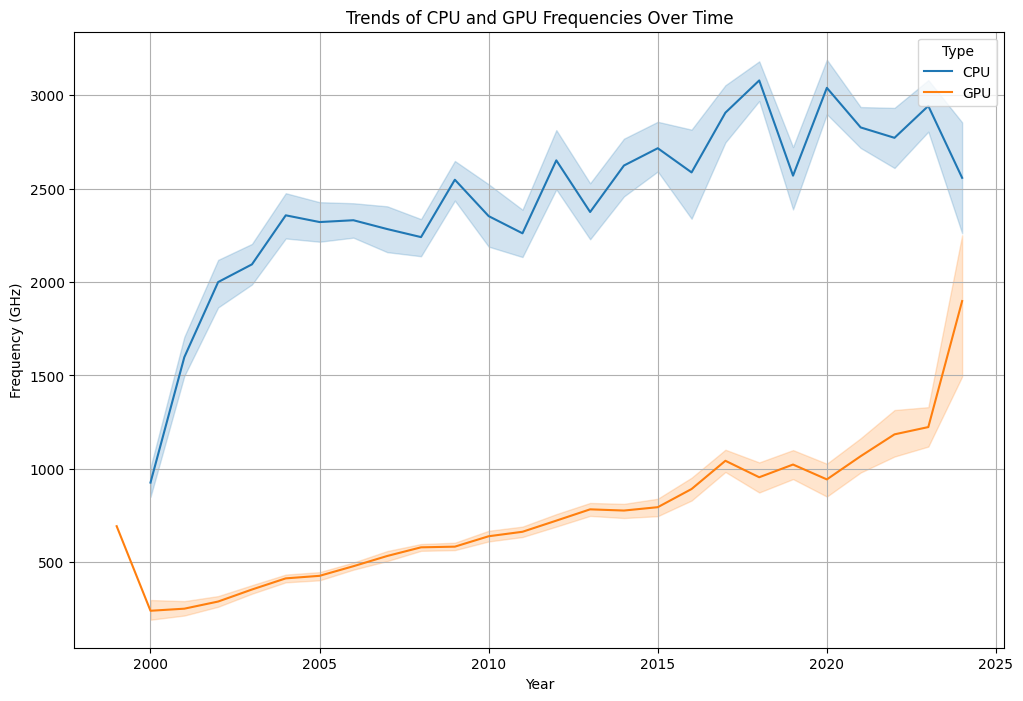

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot trends of CPU and GPU frequencies over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Freq (GHz)', hue='Type')
plt.title("Trends of CPU and GPU Frequencies Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency (GHz)")
plt.legend(title='Type')
plt.grid(True)
plt.show()


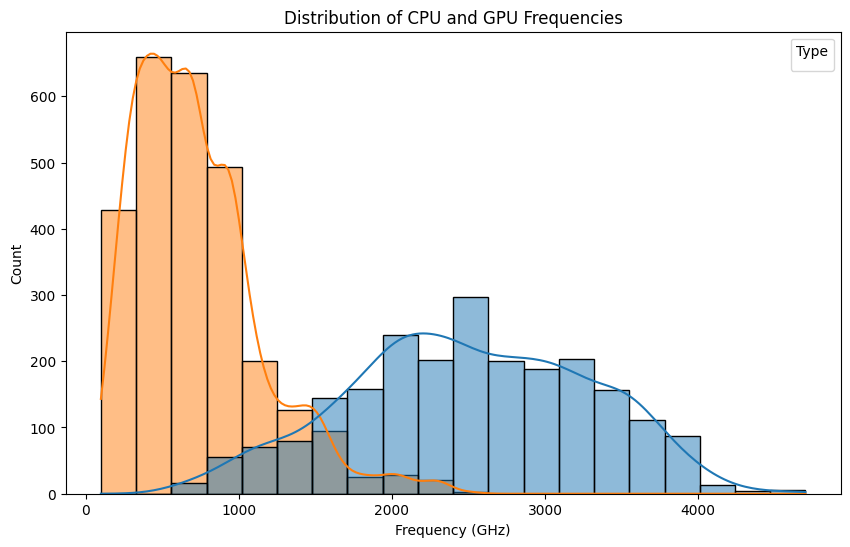

In [33]:
# Plot distribution of frequencies for CPUs and GPUs
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Freq (GHz)', bins=20, kde=True, hue='Type')
plt.title("Distribution of CPU and GPU Frequencies")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Count")
plt.legend(title='Type')
plt.show()


4.GPU performance doubles every 1.5 years.

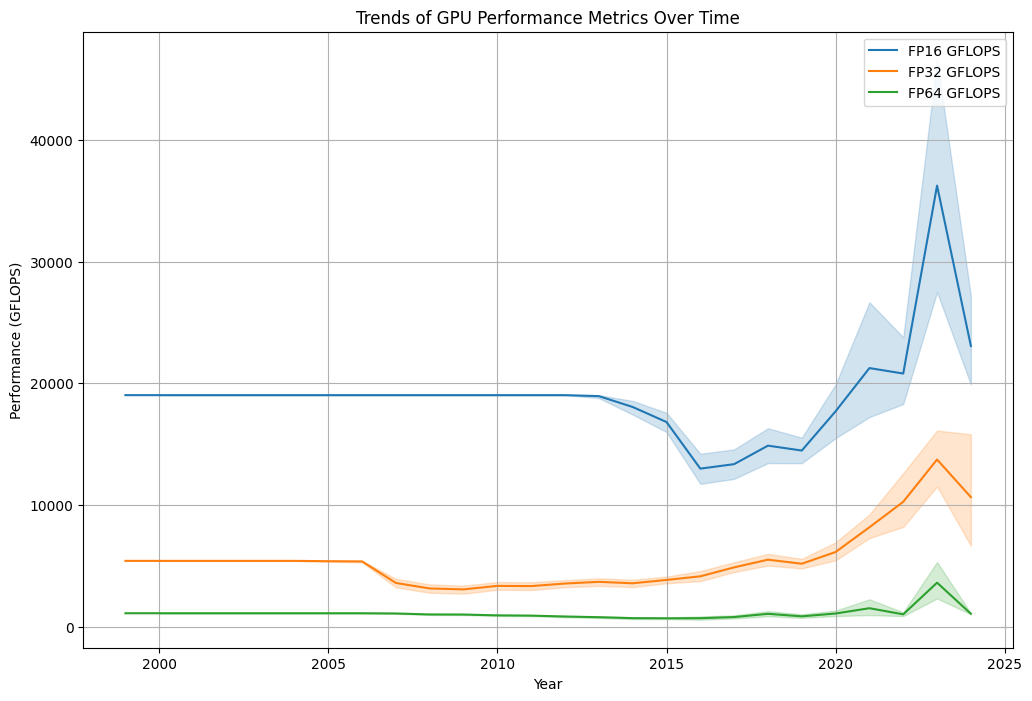

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the performance metrics to analyze
performance_metrics = ['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']

# Plot trends of GPU performance metrics over time
plt.figure(figsize=(12, 8))
for metric in performance_metrics:
    sns.lineplot(data=df, x='Year', y=metric, label=metric)
plt.title("Trends of GPU Performance Metrics Over Time")
plt.xlabel("Year")
plt.ylabel("Performance (GFLOPS)")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Calculate compound annual growth rate (CAGR) for each performance metric
for metric in performance_metrics:
    initial_value = df[metric].iloc[0]
    final_value = df[metric].iloc[-1]
    years = len(df['Year'].unique())
    cagr = ((final_value / initial_value) ** (1 / years)) - 1
    print(f"CAGR for {metric}: {cagr:.2%}")

# Verify if the CAGR aligns with the assumption of doubling every 1.5 years


CAGR for FP16 GFLOPS: nan%
CAGR for FP32 GFLOPS: nan%
CAGR for FP64 GFLOPS: nan%


In [36]:
missing_values = df[performance_metrics].isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
FP16 GFLOPS    4145
FP32 GFLOPS    3260
FP64 GFLOPS    3667
dtype: int64


In [37]:
# Impute missing values with the mean of each column
for metric in performance_metrics:
    mean_value = df[metric].mean()
    df[metric].fillna(mean_value, inplace=True)

# Now, calculate the compound annual growth rate (CAGR) for each performance metric
for metric in performance_metrics:
    initial_value = df[metric].iloc[0]
    final_value = df[metric].iloc[-1]
    years = len(df['Year'].unique())
    cagr = ((final_value / initial_value) ** (1 / years)) - 1
    print(f"CAGR for {metric}: {cagr:.2%}")


CAGR for FP16 GFLOPS: 5.04%
CAGR for FP32 GFLOPS: 10.06%
CAGR for FP64 GFLOPS: 0.08%


5.GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

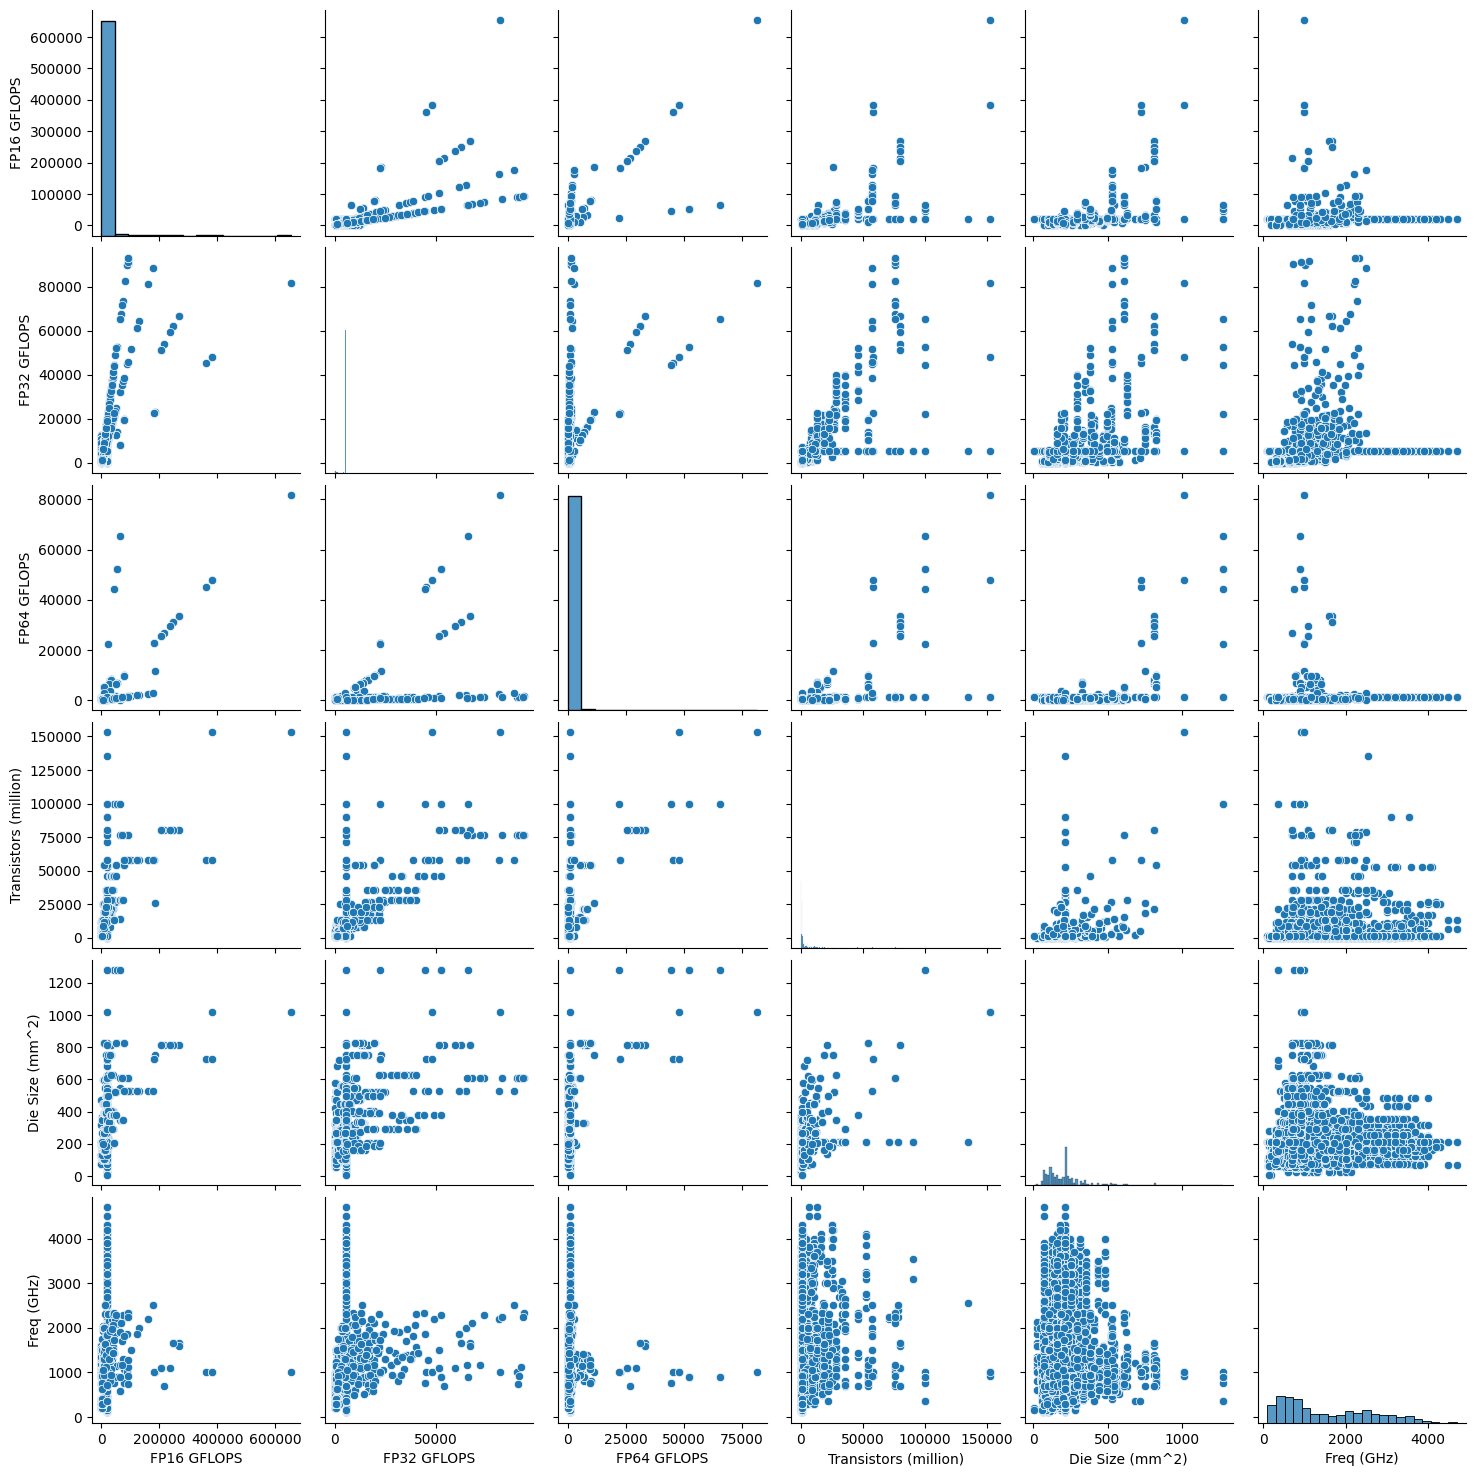

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between performance metrics and factors
sns.pairplot(df, vars=['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS', 'Transistors (million)', 'Die Size (mm^2)', 'Freq (GHz)'])
plt.show()


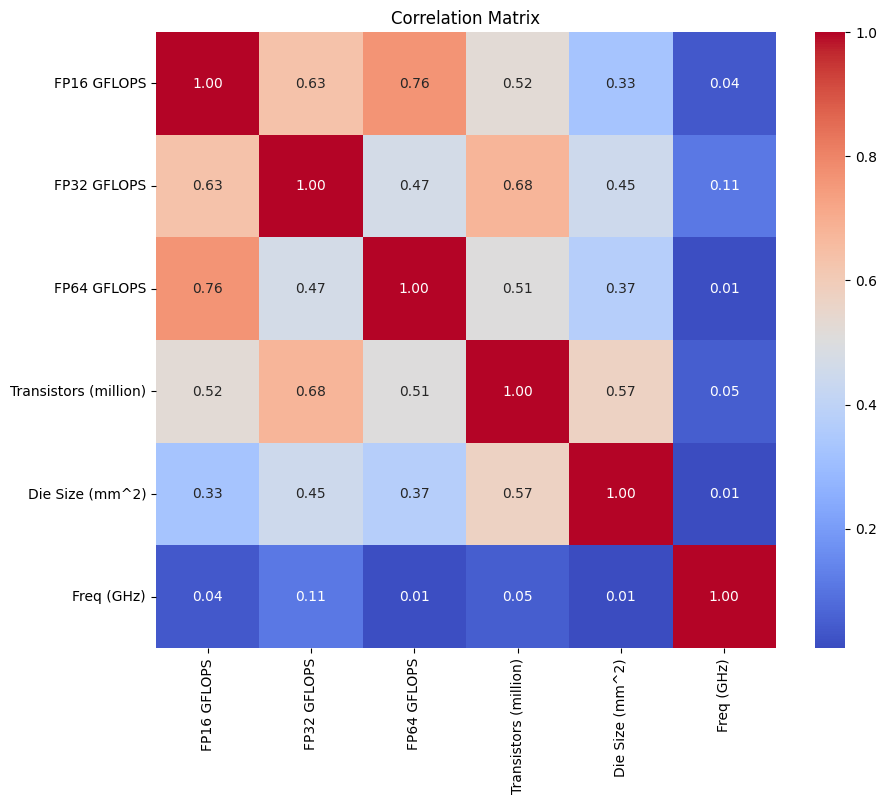

In [40]:
# Calculate correlation matrix
correlation_matrix = df[['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS', 'Transistors (million)', 'Die Size (mm^2)', 'Freq (GHz)']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


6.High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

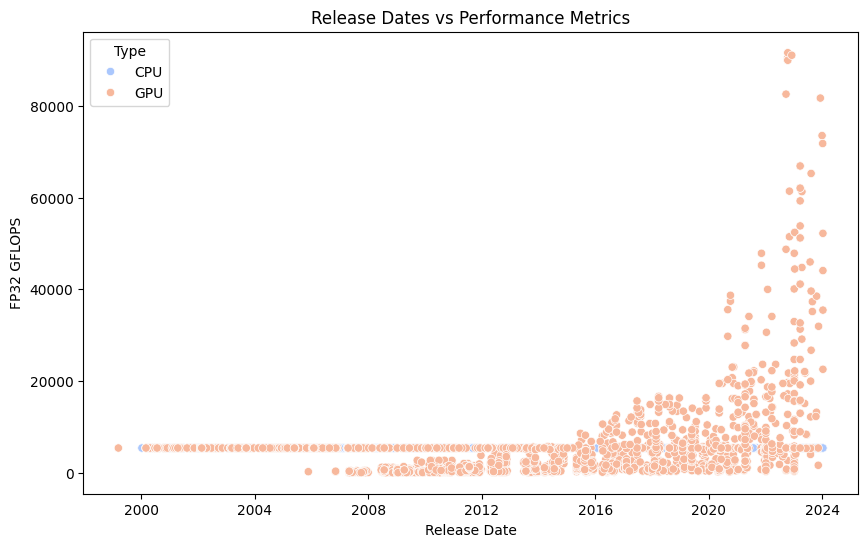

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of release dates vs performance metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Release Date', y='FP32 GFLOPS', hue='Type', palette='coolwarm')
plt.title('Release Dates vs Performance Metrics')
plt.xlabel('Release Date')
plt.ylabel('FP32 GFLOPS')
plt.legend(title='Type')
plt.show()


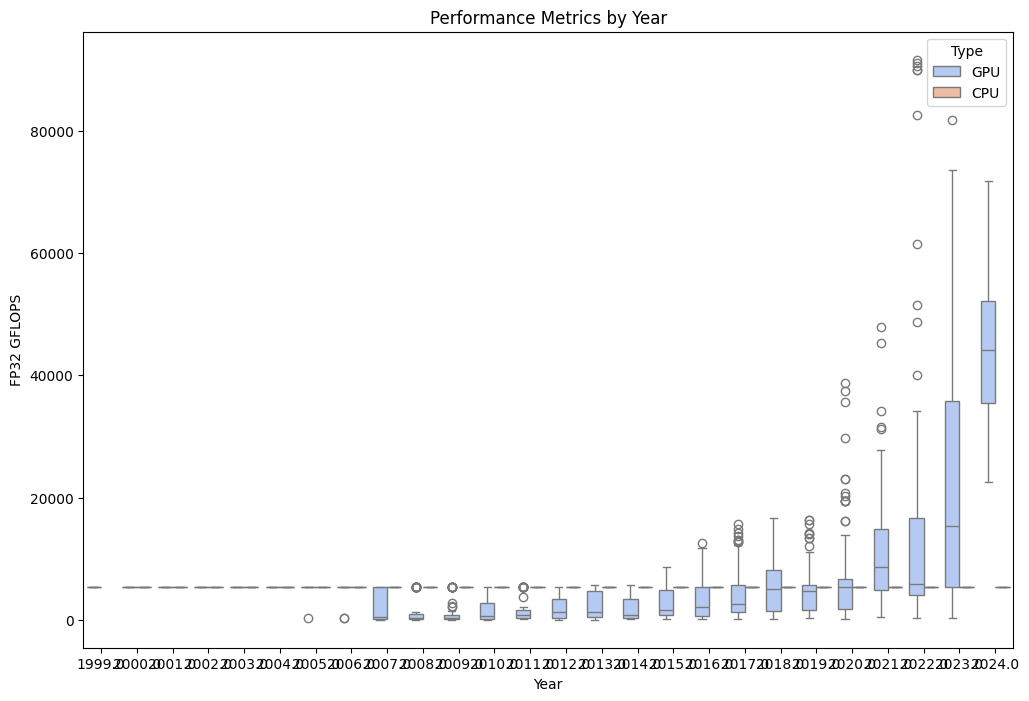

In [42]:
# Box plot of performance metrics by year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Year', y='FP32 GFLOPS', hue='Type', palette='coolwarm')
plt.title('Performance Metrics by Year')
plt.xlabel('Year')
plt.ylabel('FP32 GFLOPS')
plt.legend(title='Type')
plt.show()


7.Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

<ipython-input-43-3c0aaf0f8d2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vendor', y='Process Size (nm)', palette='coolwarm')


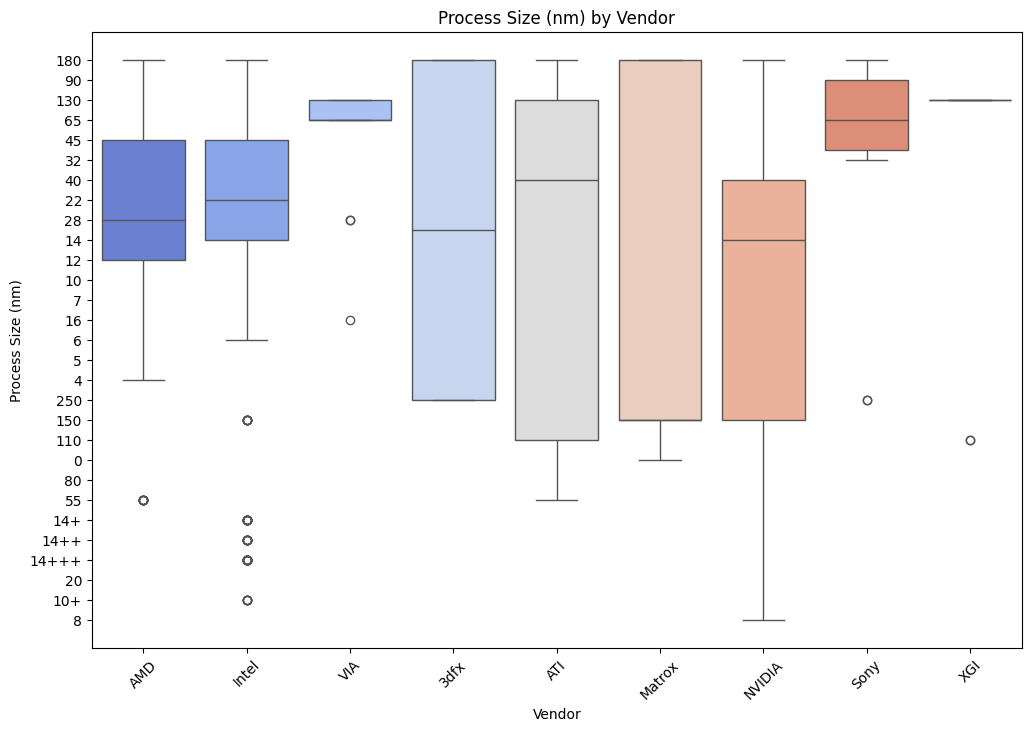

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of process size (nm) by vendor
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Vendor', y='Process Size (nm)', palette='coolwarm')
plt.title('Process Size (nm) by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Process Size (nm)')
plt.xticks(rotation=45)
plt.show()


8.TSMC makes the highest number of chips in the world

<ipython-input-44-681bfd21e5c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Foundry', palette='coolwarm')


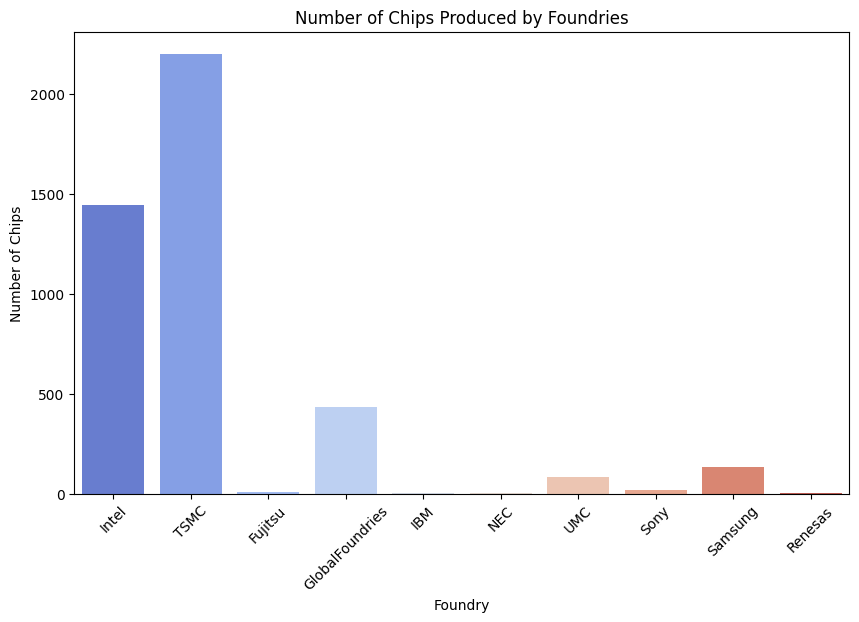

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of chips produced by foundries
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Foundry', palette='coolwarm')
plt.title('Number of Chips Produced by Foundries')
plt.xlabel('Foundry')
plt.ylabel('Number of Chips')
plt.xticks(rotation=45)
plt.show()


6.Calculate and visualized the correlation among the features

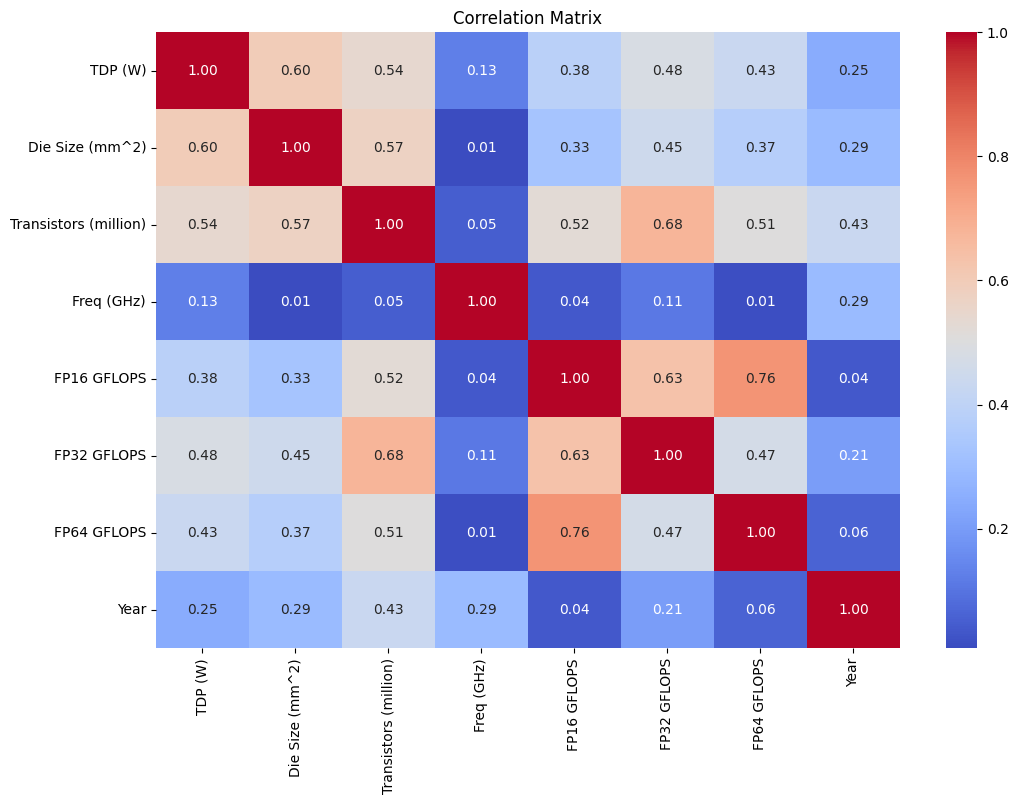

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


7.Perfom the correct encoding for your data, in readiness for modelling.

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding or label encoding
for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # Use label encoding for binary categorical variables
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        # Use one-hot encoding for categorical variables with more than 2 categories
        df = pd.get_dummies(df, columns=[col])


